                         Owner
0  nataraj.deshpande@intel.com
invoking web api... https://chromium-review.googlesource.com/changes/?q=owner:nataraj.deshpande@intel.com
<Response [200]>
invoking web api... https://gitlab.freedesktop.org/api/v4/projects/176/repository/commits?author=nataraj.deshpande@intel.com
<Response [200]>
invoking web api... https://android-review.googlesource.com/changes/?q=owner:nataraj.deshpande@intel.com%20status:open
<Response [200]>
invoking web api... https://android-review.googlesource.com/changes/?q=owner:nataraj.deshpande@intel.com%20status:MERGED
<Response [200]>
invoking web api... https://android-review.googlesource.com/changes/?q=owner:nataraj.deshpande@intel.com%20status:Abandoned
<Response [200]>
                 Branch  totalcommit
0                  Mesa           18
1         android11-dev            2
2         android13-dev            2
3   android13-tests-dev            2
4       arc-12.1.0-pre2            2
5              arc-17.3            9

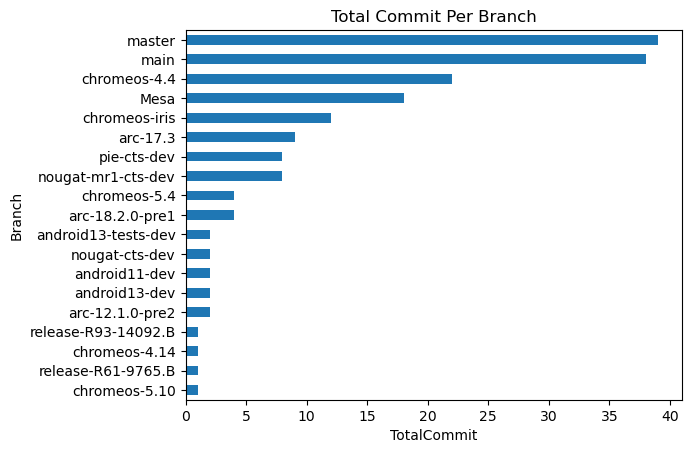

In [76]:
import requests
import json
import pandas as pd
import numpy as np
import openpyxl
import glob

def calculateSize(df):
    conditions = [
    df['insertions'] < 10,
    df['insertions'].between(10, 40),
    df['insertions'].between(40, 70)
    ]
    choices = ['XS','S','M']
    df["Size"]= np.select(conditions, choices, default='L')
    return df



def GetresponseAndroid(status,response_df,Owner):
    
    url=f"https://android-review.googlesource.com/changes/?q=owner:{Owner}%20status:{status}"
    print("invoking web api...",url)
    reponse=requests.get(url)
    print(reponse)
    output=reponse.text
    output=json.loads(output[4:])
    df = pd.DataFrame(output)
    df=df.loc[:,["subject","project","insertions","branch","updated","status"]]
    # Append new data
    response_df = pd.concat([response_df, df], ignore_index=True)
    #print(response_df.head())
    return response_df
    

def GetDetailsAndroid(Owner):
    ExisitingDatadf = pd.DataFrame()
    updated_df = pd.DataFrame()
    columns = ["subject","project","insertions","branch","updated","status"] 
    Reponse = pd.DataFrame(columns=columns)
    Reponse_final = pd.DataFrame()

    Reponse=GetresponseAndroid("open",Reponse,Owner)
    Reponse=GetresponseAndroid("MERGED",Reponse,Owner)
    Reponse=GetresponseAndroid("Abandoned",Reponse,Owner)


    Reponse_final["Subject"]= Reponse["subject"]
    Reponse_final["Project"]=Reponse["project"]
    #Reponse["insertions"] = df["insertions"]
    calculateSize(Reponse)
    Reponse_final["Size"] = Reponse["Size"]
    Reponse_final["Branch"] = Reponse["branch"]
    Reponse_final["UpdatedDate"]=Reponse["updated"]
    Reponse_final["status"]=Reponse["status"]
    Reponse_final["Owner"]=Owner
    Reponse_final["OpenSource"]="Android"
    

    filepath = r"C:\Users\kiran\OneDrive\Documents\Projects\Gerrit\XlFiles\outputAndroid.xlsx"
    ExisitingDatadf = pd.read_excel(filepath)
    updated_df = pd.concat([ExisitingDatadf, Reponse_final]).drop_duplicates().reset_index(drop=True)
    updated_df.to_excel(filepath, index=False, engine='openpyxl')

# Get details from GITLAB

def GetDetailsGITLAB(Owner):
    ExisitingDatadf = pd.DataFrame()
    updated_df = pd.DataFrame()
    url=f"https://gitlab.freedesktop.org/api/v4/projects/176/repository/commits?author={Owner}"
    print("invoking web api...",url)
    reponse=requests.get(url)
    print(reponse)
    output=reponse.text
    output=json.loads(output)
    df = pd.DataFrame(output)
    df=df.loc[:,["short_id","title","author_name","committed_date"]]
    Responsedf=pd.DataFrame()
    Responsedf["Subject"]=df["title"]
    Responsedf["Project"]="chromiumos/third_party/mesa"
    Responsedf["Size"]="unknown"
    Responsedf["Branch"]="Mesa"
    Responsedf["UpdatedDate"]=df["committed_date"]
    Responsedf["status"]="Merged"
    Responsedf["Owner"]=Owner
    Responsedf["OpenSource"]="GITLAB"
    filepath = r"C:\Users\kiran\OneDrive\Documents\Projects\Gerrit\XlFiles\outputGITLAB.xlsx"
    ExisitingDatadf = pd.read_excel(filepath)
    updated_df = pd.concat([ExisitingDatadf, Responsedf]).drop_duplicates().reset_index(drop=True)
    
    updated_df.to_excel(filepath, index=False, engine='openpyxl')
    
    
# Get details from chromium


def GetDetailsChromium(Owner):
    ExisitingDatadf = pd.DataFrame()
    updated_df = pd.DataFrame()
    Reponse_final = pd.DataFrame()
    url=f"https://chromium-review.googlesource.com/changes/?q=owner:{Owner}"
    print("invoking web api...",url)
    reponse=requests.get(url)
    print(reponse)
    output=reponse.text
    output=json.loads(output[4:])
    df = pd.DataFrame(output)
    df=df.loc[:,["subject","project","branch","status","insertions","updated"]]
   
    Reponse_final["Subject"]= df["subject"]
    Reponse_final["Project"]=df["project"]
    calculateSize(df)
    Reponse_final["Size"] = df["Size"]
    Reponse_final["Branch"] = df["branch"]
    Reponse_final["UpdatedDate"]=df["updated"]
    Reponse_final["status"]=df["status"]
    Reponse_final["Owner"]=Owner
    Reponse_final["OpenSource"]="Chromium"
    
    
    filepath = r"C:\Users\kiran\OneDrive\Documents\Projects\Gerrit\XlFiles\outputChromium.xlsx"
    ExisitingDatadf = pd.read_excel(filepath)
    updated_df = pd.concat([ExisitingDatadf, Reponse_final]).drop_duplicates().reset_index(drop=True)
    
    updated_df.to_excel(filepath, index=False, engine='openpyxl')
    

    

#read input xl

excel_file = r"C:\Users\kiran\OneDrive\Documents\Projects\Gerrit\input.xlsx"
df =pd.read_excel(excel_file)
print(df.head())

for index in df.index:
    Owner=df.iloc[index]['Owner']
    GetDetailsChromium(Owner)
    GetDetailsGITLAB(Owner)
    GetDetailsAndroid(Owner)


In [80]:

import glob
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import numpy as np
import openpyxl



def plotdata():
    file_paths = glob.glob(r"C:\Users\kiran\OneDrive\Documents\Projects\Gerrit\XlFiles\*.xlsx")  
    # Initialize an empty list to store DataFrames
    xllist = []

    # Iterate over each file and read it into a DataFrame
    for file_path in file_paths:
        df = pd.read_excel(file_path)
        xllist.append(df)

    # Concatenate all DataFrames into one
    SourceDF = pd.concat(xllist, ignore_index=True)
    
    SourceDF.to_excel(r"C:\Users\kiran\OneDrive\Documents\Projects\Gerrit\XlFiles\consolidatedxl.xlsx", index=False, engine='openpyxl')
    
    # prepare for Barchart for Total number of commits by Branch
    BarDF=pd.DataFrame()
    BarDF["Branch"]=SourceDF["Branch"]
    BarDF["Subject"]=SourceDF["Subject"]
    result =BarDF.groupby('Branch').agg(totalcommit=('Subject','count')).reset_index()
    df_sorted = result.sort_values(by='totalcommit')
    print(result)
    
       
    #plot barchart
    df_sorted.set_index("Branch").loc[:,"totalcommit"].plot.barh() 
    plt.xlabel('TotalCommit')
    plt.ylabel('Branch')
    plt.title('Total Commit Per Branch')
    
    
    #donut chart
    Donutdf=pd.DataFrame()
    Donutdf["OpenSource"]=SourceDF["OpenSource"]
    Donutdf["Subject"]=SourceDF["Subject"]
    result =Donutdf.groupby('OpenSource').agg(totalcommitdonut=('Subject','count')).reset_index()
  
    labels =result["OpenSource"]
    sizes = result["totalcommitdonut"]
    # Plotting
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    # Draw a white circle in the center to create the donut effect
    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(center_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle
    ax.axis('equal')

    plt.title('Donut Chart')
    plt.show()
    
    

    

                 Branch  totalcommit
0                  Mesa           18
1         android11-dev            2
2         android13-dev            2
3   android13-tests-dev            2
4       arc-12.1.0-pre2            4
5              arc-17.3           18
6       arc-18.2.0-pre1            8
7         chromeos-4.14            2
8          chromeos-4.4           44
9         chromeos-5.10            2
10         chromeos-5.4            8
11        chromeos-iris           12
12                 main           54
13               master           72
14       nougat-cts-dev            2
15   nougat-mr1-cts-dev            8
16          pie-cts-dev            8
17   release-R61-9765.B            2
18  release-R93-14092.B            2


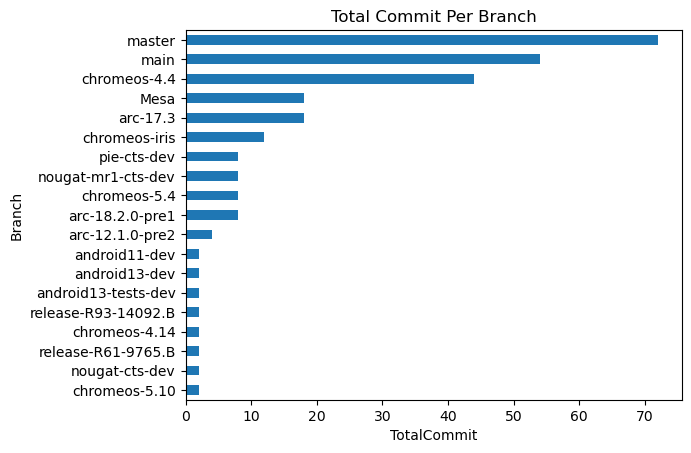

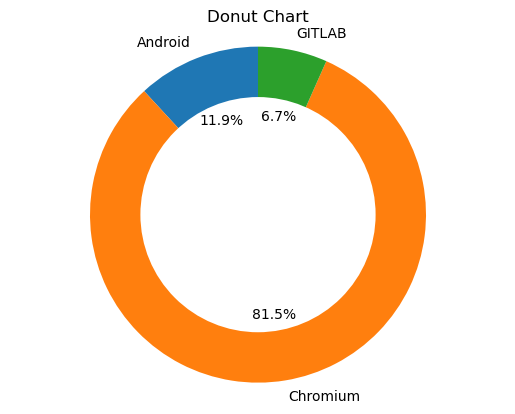

In [81]:
plotdata()
